In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.linalg as npl

df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
data = df.values 

In [2]:
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
5,1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63N,3.23W
6,1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63N,3.23W
7,1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63N,3.23W
8,1849-09-01,23.662,1.226,Abidjan,Côte D'Ivoire,5.63N,3.23W
9,1849-10-01,25.263,1.175,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [4]:
df['City'].nunique()

100

In [6]:
df['City'].value_counts()

Montreal            3239
Toronto             3239
Saint Petersburg    3239
New York            3239
Madrid              3239
                    ... 
Kano                1893
Cape Town           1881
Durban              1881
Umm Durman          1857
Lima                1591
Name: City, Length: 100, dtype: int64

In [18]:
for idx,city in enumerate(df.City.unique()):
    
    break
    if city[0] == 'A':
        continue
    print(city)
    

nyc = df[df['City'] == 'New York']


In [20]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3239 entries, 169769 to 173007
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             3239 non-null   object 
 1   AverageTemperature             3119 non-null   float64
 2   AverageTemperatureUncertainty  3119 non-null   float64
 3   City                           3239 non-null   object 
 4   Country                        3239 non-null   object 
 5   Latitude                       3239 non-null   object 
 6   Longitude                      3239 non-null   object 
dtypes: float64(2), object(5)
memory usage: 202.4+ KB


In [21]:
nyc.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,3119.000000,3119.000000
mean,9.523296,1.327823
std,9.250677,1.483651
min,-9.162000,0.075000
25%,1.037000,0.266500
50%,9.411000,0.586000
75%,18.503500,2.020000
max,29.141000,10.193000


In [22]:
nyc.dt

169769    1743-11-01
169770    1743-12-01
169771    1744-01-01
169772    1744-02-01
169773    1744-03-01
             ...    
173003    2013-05-01
173004    2013-06-01
173005    2013-07-01
173006    2013-08-01
173007    2013-09-01
Name: dt, Length: 3239, dtype: object

In [27]:
nyc.dt = pd.to_datetime(nyc.dt)



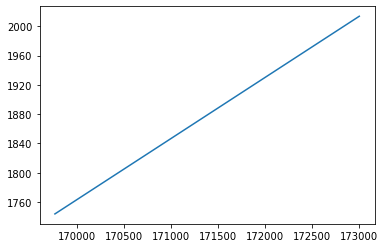

In [28]:
nyc.dt.plot()

In [31]:
nyc.columns()

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [38]:
y_col, x_col = list(nyc.columns[[1,0]])

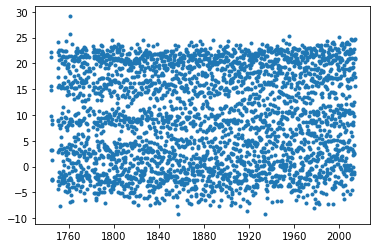

In [41]:
plt.plot(nyc[x_col], nyc[y_col], '.')

In [51]:
nyc[np.array([time.month for time in nyc.dt]) == 11]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
169769,1743-11-01,3.264,1.665,New York,United States,40.99N,74.56W
169781,1744-11-01,3.161,1.405,New York,United States,40.99N,74.56W
169793,1745-11-01,NaN,NaN,New York,United States,40.99N,74.56W
169805,1746-11-01,NaN,NaN,New York,United States,40.99N,74.56W
169817,1747-11-01,NaN,NaN,New York,United States,40.99N,74.56W
...,...,...,...,...,...,...,...
172949,2008-11-01,5.133,0.225,New York,United States,40.99N,74.56W
172961,2009-11-01,8.217,0.181,New York,United States,40.99N,74.56W
172973,2010-11-01,5.876,0.174,New York,United States,40.99N,74.56W
172985,2011-11-01,8.013,0.298,New York,United States,40.99N,74.56W


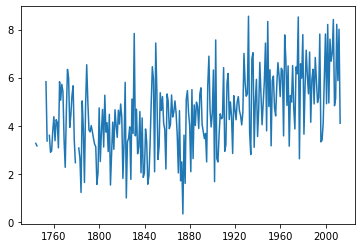

In [55]:
nyc_nov = nyc[np.array([time.month for time in nyc.dt]) == 11]
plt.plot(nyc_nov[x_col], nyc_nov[y_col], '-')

month: 1


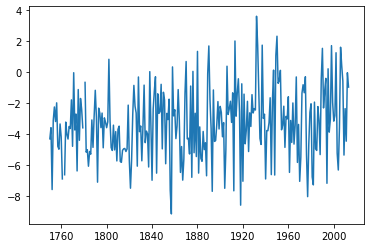

month: 2


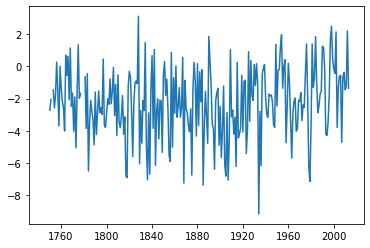

month: 3


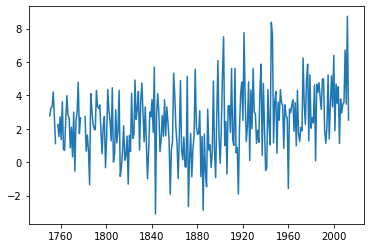

month: 4


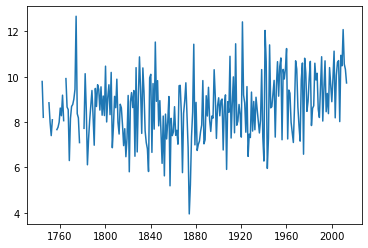

month: 5


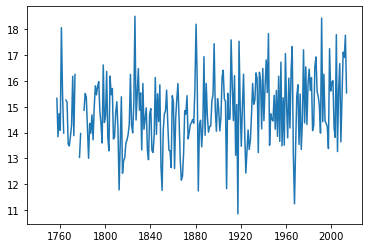

month: 6


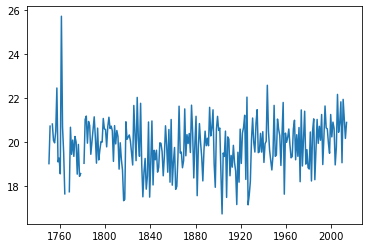

month: 7


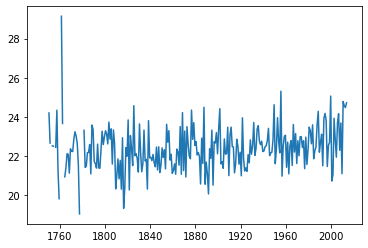

month: 8


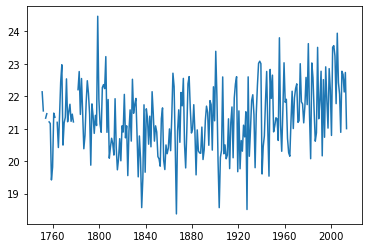

month: 9


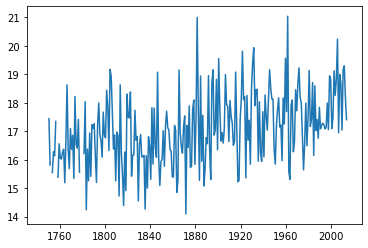

month: 10


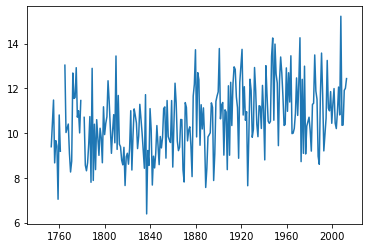

month: 11


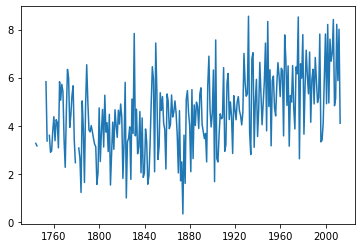

month: 12


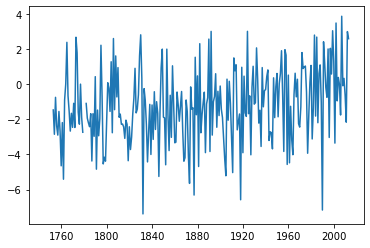

In [58]:
for month in range (1,13):
    print(f"month: {month}")
    nyc_m = nyc[np.array([time.month for time in nyc.dt]) == month]
    plt.plot(nyc_m[x_col], nyc_m[y_col], '-')
    plt.show()